## Exercise 2

Feeature Extraction

In [87]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings = True

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight = 'bold', labelsize = 'large', titleweight='bold', titlesize = 18, titlepad = 10)
plt.rc('image', cmap='magma')

tf.config.run_functions_eagerly(True)

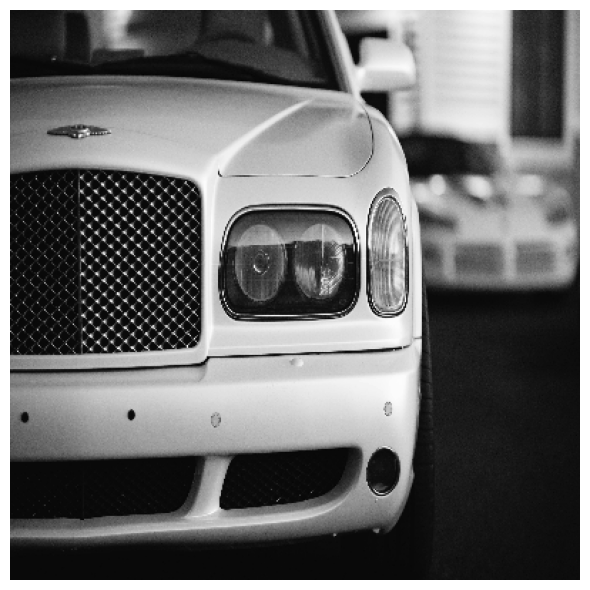

In [88]:
# Display image we are working with
image_path = 'resources/car_illus.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400,400])

img = tf.squeeze(image).numpy()
plt.figure(figsize=(6,6))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

## Define the Kernel

The standard kernel layouts are:

Edge Detect - focuses on the center, not the edges

Bottom Sobel - focuses on the bottom while keeping the middle balanced and tuning down the top

Emboss - focuses on the bottom right corner

Sharpen - focuses mostly on the middle but tunes down the outer edges while keeping the corners balanced



In [89]:
import seaborn as sns

edge = np.array([[-1,-1,-1],
        [-1,8,-1],
        [-1,-1,-1]
        ])

bottom = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]]
                   )

emboss = np.array([[-2,-1,-0],
                   [-1,1,1],
                   [0,1,2]]
                   )

sharpen = np.array([[0,-1,-0],
                   [-1,5,-1],
                   [0,-1,0]]
                   )

print(edge,'\n')
print(bottom,'\n')
print(emboss,'\n')
print(sharpen,'\n')

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]] 

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]] 

[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]] 

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]] 



In [104]:
# First we define a constant kernel
kernel = tf.constant([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

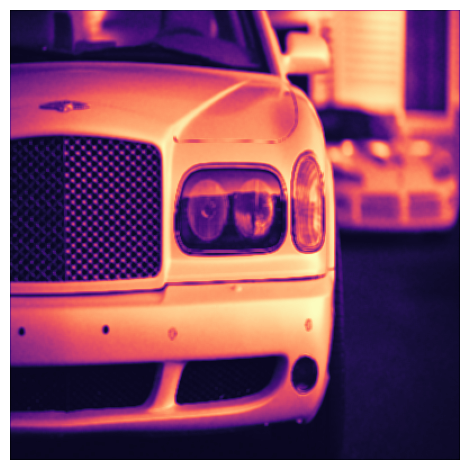

In [105]:
# then using the constant kernel, we do some feature extraction
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# and apply convolution
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()

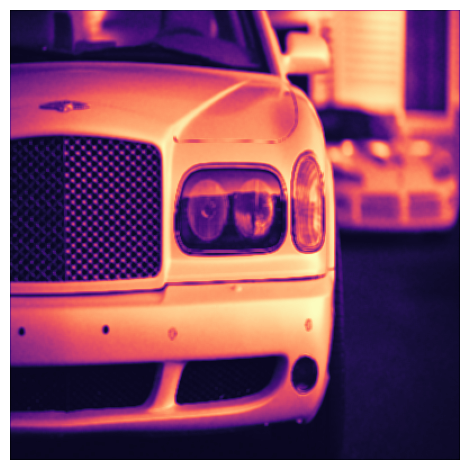

In [106]:
# Now we detect featueres using ReLU
relu_fn = tf.nn.relu

image_detect = relu_fn(image_filter)

plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show()

## Repeating the Process

A constant kernel doesn't do very much transformation. Now we can try the same operations, but with each of the other four kernels to see how they differ

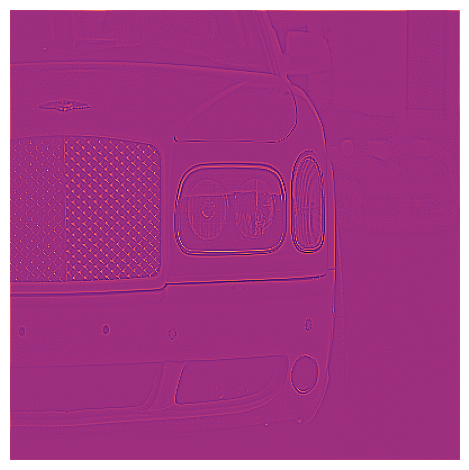

In [119]:
# Edge
kernel = tf.constant(edge)
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# and apply convolution
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()

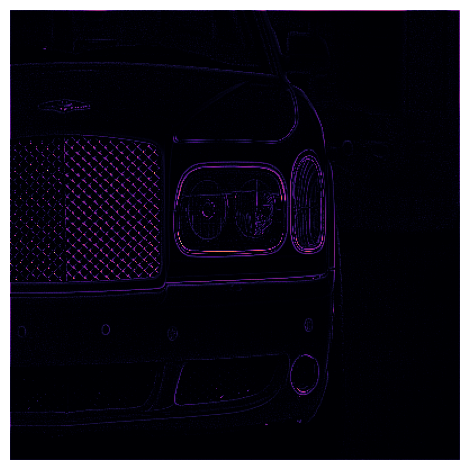

In [120]:
# Now we detect featueres using ReLU
relu_fn = tf.nn.relu

image_detect = relu_fn(image_filter)

plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show()

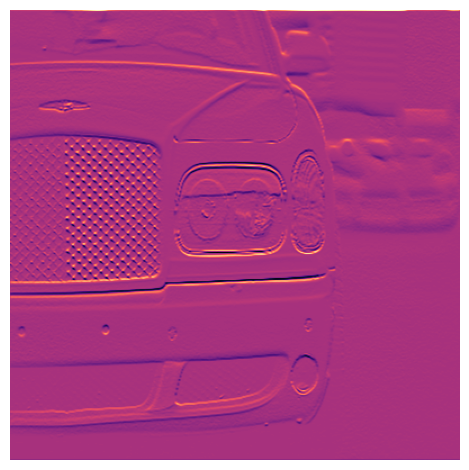

In [121]:
# Bottom
kernel = tf.constant(bottom)
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# and apply convolution
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()

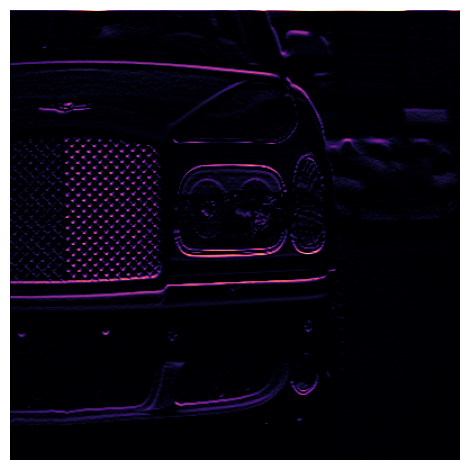

In [122]:
# Now we detect featueres using ReLU
relu_fn = tf.nn.relu

image_detect = relu_fn(image_filter)

plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show()

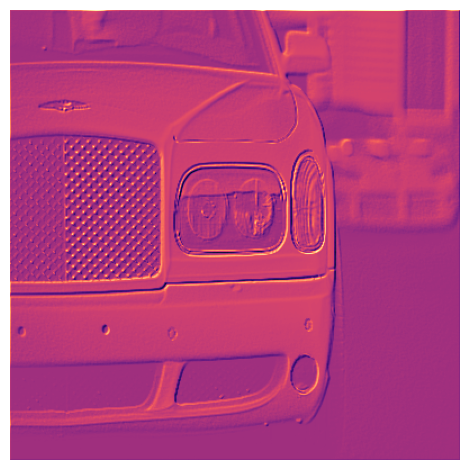

In [123]:
# Emboss
kernel = tf.constant(emboss)
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# and apply convolution
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()

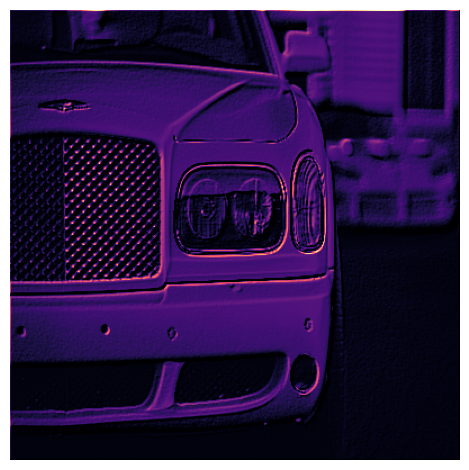

In [124]:
# Now we detect featueres using ReLU
relu_fn = tf.nn.relu

image_detect = relu_fn(image_filter)

plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show()

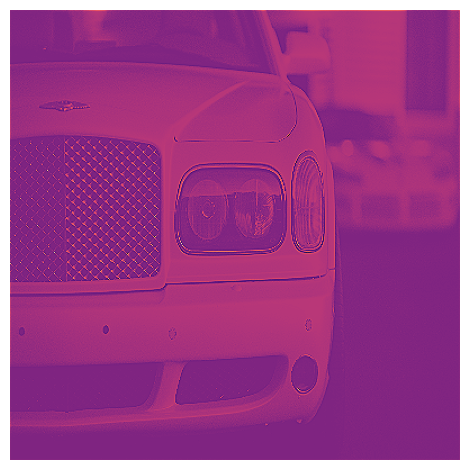

In [125]:
# Sharpen
kernel = tf.constant(sharpen)
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# and apply convolution
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()

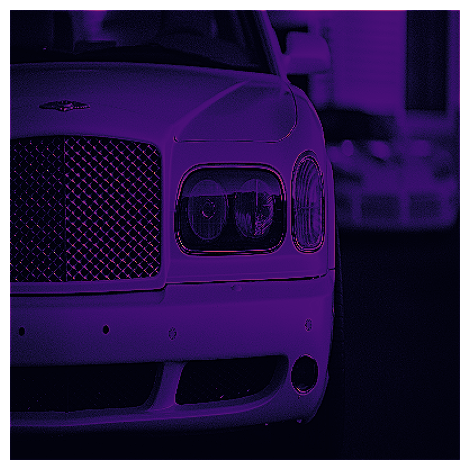

In [126]:
# Now we detect featueres using ReLU
relu_fn = tf.nn.relu

image_detect = relu_fn(image_filter)

plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show()

The choice of kernel has a heavy impact on the effectiveness of the model. Careful consideration should be taken to ensure the greatest effectiveness